In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import io
from google.colab import files, drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def upload_image():
    uploaded = files.upload()  # Let user upload an image
    if uploaded:
        img_name = list(uploaded.keys())[0]
        img = Image.open(io.BytesIO(uploaded[img_name]))
        return img_name, img
    return None, None

# Load pre-trained models (replace with your own model paths)
def load_models():
    # Assuming you have saved models or using pre-trained TensorFlow models
    segmentation_model = tf.keras.models.load_model('/content/drive/My Drive/tomato/best_unet_model.keras')
    classification_model = tf.keras.models.load_model('/content/drive/My Drive/tomato/best_segmented_cnn.keras')
    return segmentation_model, classification_model

# Function to preprocess image
def preprocess_image(image, target_size):
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize to [0,1]
    return image

# Function to display the image
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

Please upload an image:


Saving earlyblight.jpeg to earlyblight.jpeg
Performing segmentation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Performing classification...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


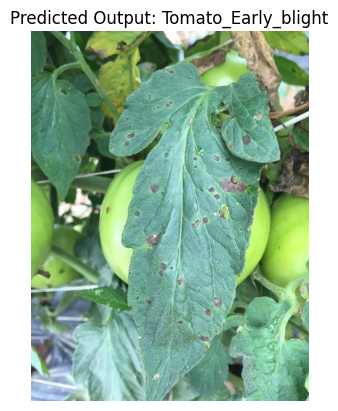

In [ ]:
class_names = ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Mosaic_virus', 'Tomato_Septoria_leafspot', 'Tomato_Spider_mites', 'Tomato_Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus']
print("Please upload an image:")
img_name, img = upload_image()
if img is None:
    print("No image uploaded")
# Step 2: Load models
segmentation_model, classification_model = load_models()

# Step 3: Preprocess the uploaded image for segmentation
seg_input_size = (256, 256)  # Example target size for segmentation model
seg_image = preprocess_image(img, seg_input_size)

# Add batch dimension for model input
seg_image = np.expand_dims(seg_image, axis=0)

print("Performing segmentation...")
segmentation_output = segmentation_model.predict(seg_image)
segmentation_output = np.squeeze(segmentation_output)

# Step 6: Preprocess the segmented image for classification
class_input_size = (256, 256)  # Example target size for classification model
class_image = preprocess_image(Image.fromarray((segmentation_output * 255).astype(np.uint8)), class_input_size)

class_image = np.expand_dims(class_image, axis=0)

# Step 7: Perform classification on the segmented image
print("Performing classification...")
classification_output = classification_model.predict(class_image)

class_idx = np.argmax(classification_output)
display_image(img, f'Predicted Output: {class_names[class_idx]}')